In [2]:
from qiskit import *

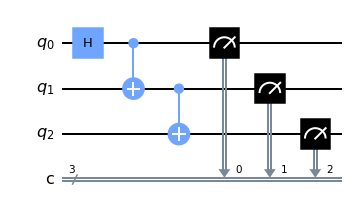

In [3]:
nqubits = 3
circuit = QuantumCircuit(nqubits,nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])
%matplotlib inline
circuit.draw(output='mpl')

In [5]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit,backend=simulator,shots=1024).result()

In [6]:
from qiskit.visualization import plot_histogram

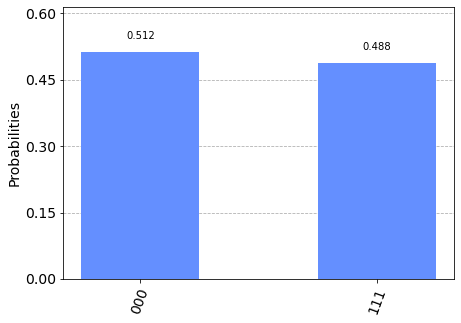

In [7]:
plot_histogram(sim_result.get_counts(circuit))

In [47]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmq_belem')

ibmqfactory.load_account:WARNING:2022-07-20 21:06:16,364: Credentials are already in use. The existing account in the session will be replaced.


In [10]:
job = execute(circuit,backend=device,shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

62d89e595f294b357a5235de
Job Status: job has successfully run


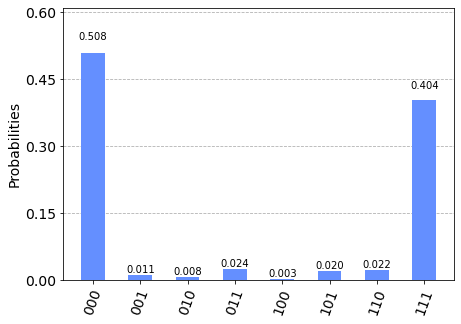

In [11]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [15]:
from qiskit.utils.mitigation import (complete_meas_cal, CompleteMeasFitter)

In [16]:
cal_circuits, state_labels = complete_meas_cal(qr=circuit.qregs[0],circlabel='measerrormitigtioncal')

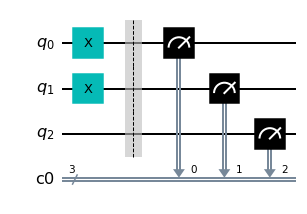

In [31]:
cal_circuits[3].draw(output='mpl')

In [18]:
len(cal_circuits)

8

In [21]:
cal_job = execute(cal_circuits,
                 backend = device,
                 shots = 1024,
                 optimization_level = 0,
                 )
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

62d8a11f5f294b464f5235e3
Job Status: job has successfully run


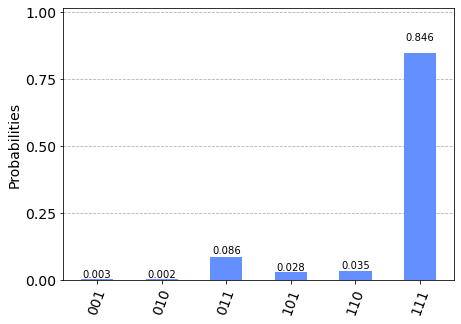

In [57]:
plot_histogram(cal_results.get_counts(cal_circuits[7]))

In [32]:
meas_fitter = CompleteMeasFitter(cal_results,state_labels)

In [40]:
meas_filter = meas_fitter.filter

In [41]:
mitigated_result = meas_filter.apply(device_result)

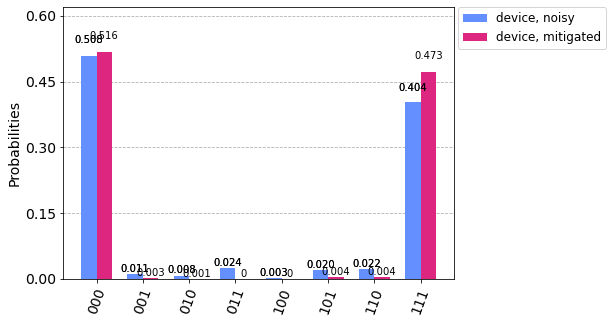

In [42]:
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts,mitigated_counts],legend=['device, noisy','device, mitigated'])

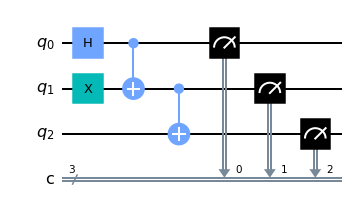

In [44]:
circuit2 = QuantumCircuit(nqubits,nqubits)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2],[0,1,2])
circuit2.draw(output='mpl')

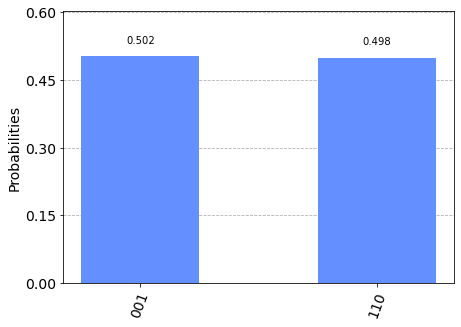

In [45]:
plot_histogram(

    execute(circuit2,backend=simulator,shots=1024).result().get_counts(circuit2)

)

In [48]:
device_counts_2 = execute(circuit2,backend=device,shots=1024).result().get_counts(circuit2)

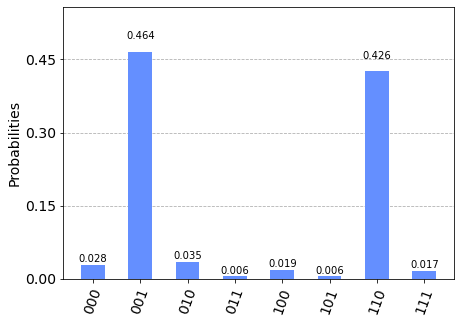

In [49]:
plot_histogram(device_counts_2)

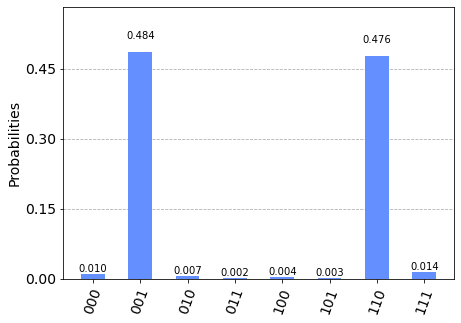

In [50]:
device_mitigated_counts_2 = meas_filter.apply(device_counts_2)
plot_histogram(device_mitigated_counts_2)